In [1]:
!pip3 install pandas
!pip3 install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np

def clean_gdp_data():
    # Read the CSV file
    df = pd.read_csv('datasets/us-gov-data.csv')
    
    # Get the original column names
    original_cols = df.columns.tolist()
    
    # Create new column names mapping
    new_columns = {
        original_cols[0]: 'Line',
        original_cols[1]: 'Description',
        original_cols[2]: '2021_Annual',
        original_cols[3]: '2022_Annual',
        original_cols[4]: '2023_Annual',
        original_cols[5]: '2020_Q3',
        original_cols[6]: '2020_Q4',
        original_cols[7]: '2021_Q1',
        original_cols[8]: '2021_Q2',
        original_cols[9]: '2021_Q3',
        original_cols[10]: '2021_Q4',
        original_cols[11]: '2022_Q1',
        original_cols[12]: '2022_Q2',
        original_cols[13]: '2022_Q3',
        original_cols[14]: '2022_Q4',
        original_cols[15]: '2023_Q1',
        original_cols[16]: '2023_Q2',
        original_cols[17]: '2023_Q3',
        original_cols[18]: '2023_Q4',
        original_cols[19]: '2024_Q1',
        original_cols[20]: '2024_Q2'
    }
    
    # Rename the columns
    df = df.rename(columns=new_columns)
    
    # Convert numeric columns to float, replacing '.....*.' with NaN
    numeric_cols = df.columns[2:]  # All columns except Line and Description
    for col in numeric_cols:
        df[col] = df[col].replace('.....*.',np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

# Clean the data
gdp_df = clean_gdp_data()

# Display information about the dataset
print("\n=== First 5 Rows ===")
print(gdp_df.head())

print("\n=== Column Names ===")
print("\nAll columns:", gdp_df.columns.tolist())
print("\nNumber of columns:", len(gdp_df.columns))

print("\n=== Dataset Info ===")
print(gdp_df.info())

# Save the cleaned data
gdp_df.to_csv('cleaned_gdp_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_gdp_data.csv'")


=== First 5 Rows ===
   Line                        Description  2021_Annual  2022_Annual  \
0  Line                                NaN       2021.0       2022.0   
1   NaN                                NaN          NaN          NaN   
2   NaN                                NaN          NaN          NaN   
3     1       Gross domestic product (GDP)          6.1          2.5   
4     2  Personal consumption expenditures          8.8          3.0   

   2023_Annual  2020_Q3  2020_Q4  2021_Q1  2021_Q2  2021_Q3  ...  2022_Q1  \
0       2023.0      NaN      NaN      NaN      NaN      NaN  ...      NaN   
1          NaN   2020.0      NaN   2021.0      NaN      NaN  ...   2022.0   
2          NaN      NaN      NaN      NaN      NaN      NaN  ...      NaN   
3          2.9     35.2      4.4      5.6      6.4      3.5  ...     -1.0   
4          2.5     41.2      5.8      9.5     14.1      3.1  ...      1.0   

   2022_Q2  2022_Q3  2022_Q4  2023_Q1  2023_Q2  2023_Q3  2023_Q4  2024_Q1  \
0    

In [6]:
data_v3 = pd.read_csv("datasets/final-worked_gdp_data.csv")
# Replace `row_index` with the index number of the row you want to print
row_data = data_v3.iloc[0]
print(row_data)


Line                                      1
Description    Gross domestic product (GDP)
2021_Annual                             6.1
2022_Annual                             2.5
2023_Annual                             2.9
2020_Q3                                35.2
2020_Q4                                 4.4
2021_Q1                                 5.6
2021_Q2                                 6.4
2021_Q3                                 3.5
2021_Q4                                 7.4
2022_Q1                                -1.0
2022_Q2                                 0.3
2022_Q3                                 2.7
2022_Q4                                 3.4
2023_Q1                                 2.8
2023_Q2                                 2.4
2023_Q3                                 4.4
2023_Q4                                 3.2
2024_Q1                                 1.6
2024_Q2                                 3.0
Name: 0, dtype: object


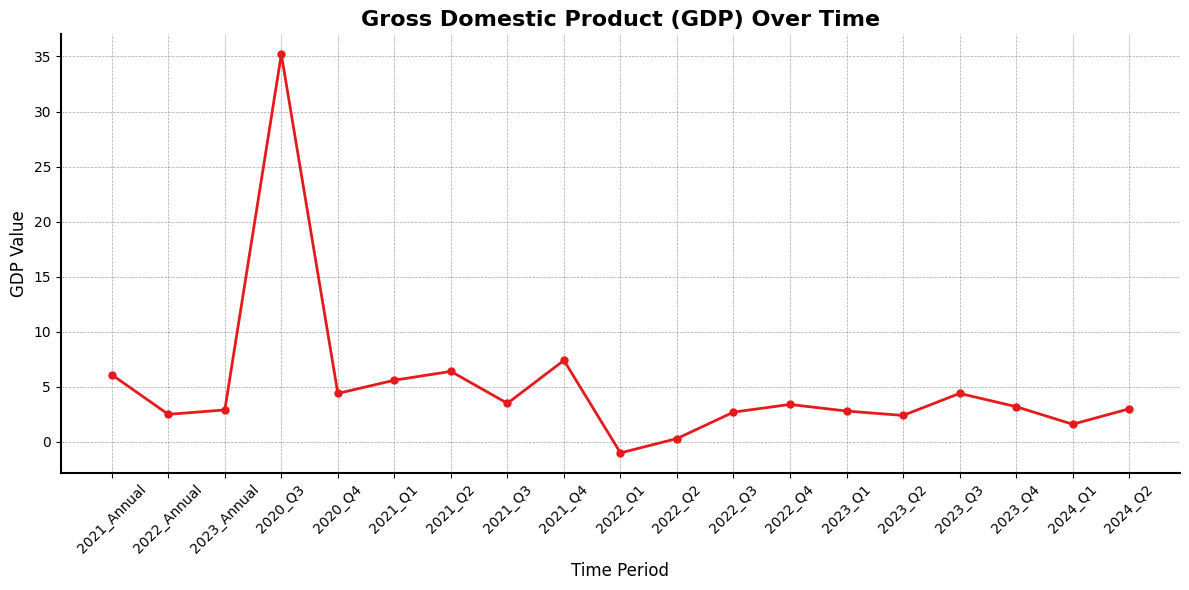

In [7]:
import matplotlib.pyplot as plt

data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")

# Extract GDP data for plotting (quarterly only)
gdp_data = data_new.iloc[0]
quarterly_data = gdp_data.filter(like='_Q')

# Rename quarterly periods to a more descriptive format
quarters = [label.replace('_Q', ' Quarter ') for label in quarterly_data.index]
gdp_values = quarterly_data.values.astype(float)

# Plotting
plt.figure(figsize=(12, 6), dpi=150)  # High DPI for better quality
plt.plot(quarters, gdp_values, color='#e41a1c', linestyle='-', linewidth=2)  # Line without markers

# Customize plot appearance
plt.title('Gross Domestic Product (GDP) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('GDP Value', fontsize=12)
plt.xticks(rotation=45)

# Minimalist style with only vertical grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

plt.tight_layout()  # Adjust layout for readability
plt.show()
